In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

In [3]:
# Data cleaning
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [4]:
# Data transformation
# Convert quality to a binary variable indicating good (quality >= 6) or bad (quality < 6) wine
df['quality_label'] = df['quality'].apply(lambda x: 'good' if x >= 6 else 'bad')

In [5]:
# Data splitting
# Split the data into training and testing sets
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Model training
# Train a random forest regressor to predict wine quality
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
# Model evaluation
# Predict wine quality on the test set
y_pred = rf_model.predict(X_test)

In [8]:
# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.3835867647058824
R-squared: 0.45848296601599026


In [9]:
# Feature importance
feature_importance = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


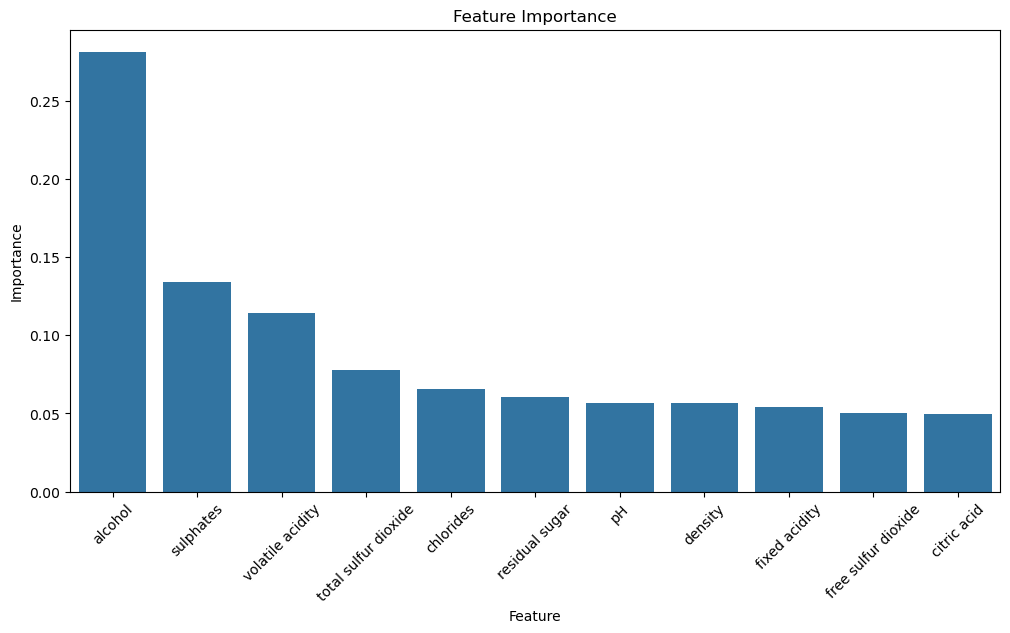

In [10]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()